In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("RdBu")

In [2]:
data = pd.read_csv("supermarket_sales.csv")

In [3]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
data.shape

(1000, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
data.isna().sum() / data.shape[0]

Invoice ID                 0.0
Branch                     0.0
City                       0.0
Customer type              0.0
Gender                     0.0
Product line               0.0
Unit price                 0.0
Quantity                   0.0
Tax 5%                     0.0
Total                      0.0
Date                       0.0
Time                       0.0
Payment                    0.0
cogs                       0.0
gross margin percentage    0.0
gross income               0.0
Rating                     0.0
dtype: float64

In [7]:
data.duplicated().any()

False

In [8]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [9]:
data.describe(include=object)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,2/7/2019,19:48,Ewallet
freq,1,340,340,501,501,178,20,7,345


In [10]:
def count_plot(x_axis, hue = None, rotation = 0):
    graph = sns.countplot(x = x_axis, data = data, hue = hue, order = data[x_axis].value_counts().index)
    for container in graph.containers:
        graph.bar_label(container)
    plt.xticks(rotation = rotation)
    plt.show()

In [11]:
def pie_plot(column_name):
    plt.pie(data[column_name].value_counts(), labels = data[column_name].value_counts().index, shadow=True, autopct="%1.1f%%")
    plt.show()

In [12]:
def box_plot(x_axis=None, y_axis=None, hue=None, col=None):
    sns.catplot(x=x_axis, y=y_axis, data=data, hue=hue, kind='box', col=col)
    plt.xlabel(x_axis)
    plt.ylabel("FRQ")
    plt.show()

In [13]:
data['Date'] = pd.to_datetime(data["Date"])

In [14]:
data['Month'] = data['Date'].dt.month

In [15]:
data.drop(columns=['Invoice ID', "cogs", "gross margin percentage", "Date", "Time"], inplace=True)

In [16]:
data.sample(2)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,gross income,Rating,Month
272,A,Yangon,Member,Female,Home and lifestyle,21.54,9,9.693,203.553,Credit card,9.693,8.8,1
702,B,Mandalay,Member,Female,Fashion accessories,19.77,10,9.885,207.585,Credit card,9.885,5.0,2


In [17]:
data["Branch"].unique()

array(['A', 'C', 'B'], dtype=object)

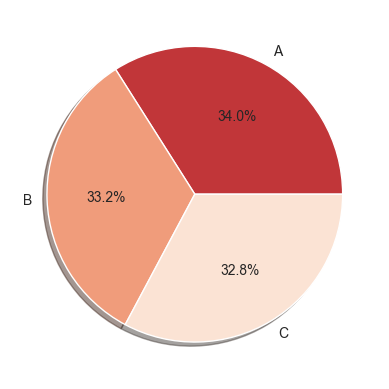

In [18]:
pie_plot('Branch')

In [19]:
data["Customer type"].unique()

array(['Member', 'Normal'], dtype=object)

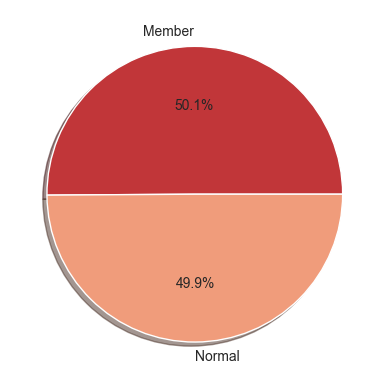

In [20]:
pie_plot("Customer type")

In [21]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

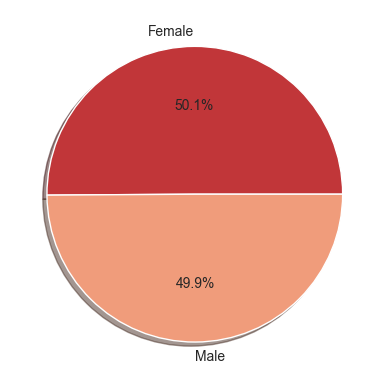

In [22]:
pie_plot("Gender")

In [23]:
data['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

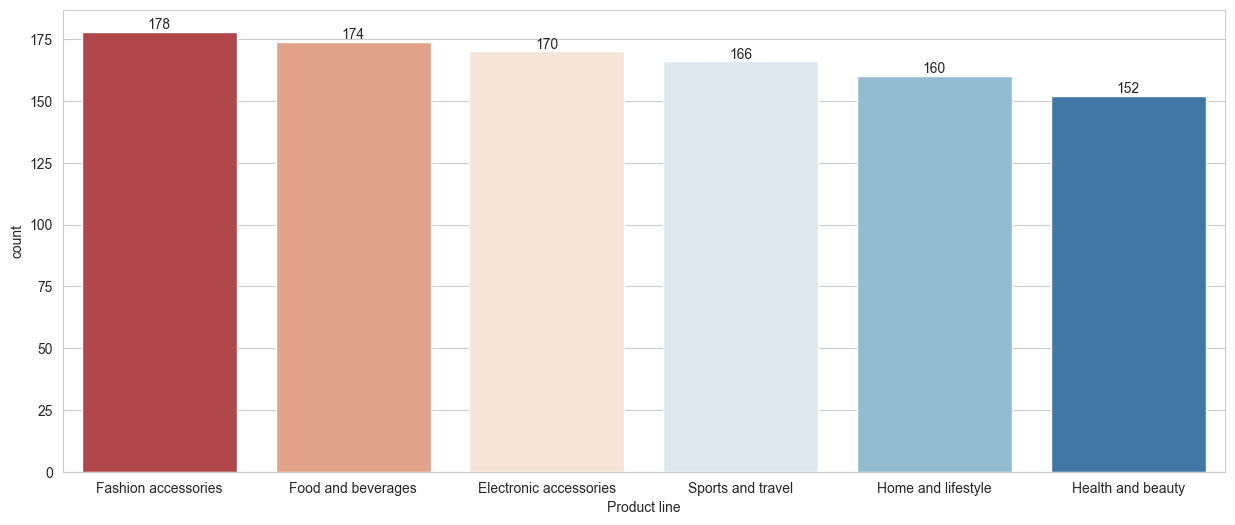

In [24]:
plt.figure(figsize=(15,6))
count_plot("Product line")

In [25]:
data['Payment'].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

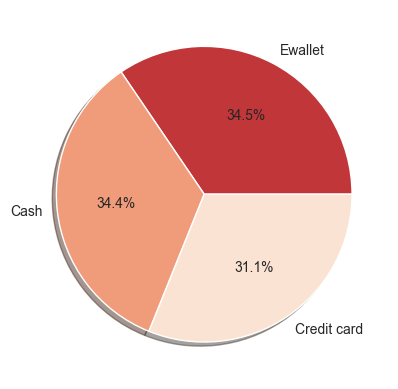

In [26]:
pie_plot('Payment')

In [27]:
data['Rating'].unique()

array([ 9.1,  9.6,  7.4,  8.4,  5.3,  4.1,  5.8,  8. ,  7.2,  5.9,  4.5,
        6.8,  7.1,  8.2,  5.7,  4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,
        6. ,  8.5,  6.7,  7.7,  7.5,  7. ,  4.7,  7.6,  7.9,  6.3,  5.6,
        9.5,  8.1,  6.5,  6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,
        8.7,  9.4,  5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,
        8.8,  6.2,  9.8,  9.7,  5. ,  8.9])

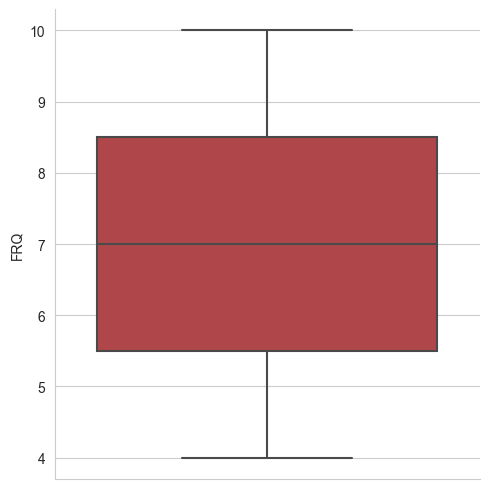

In [28]:
box_plot(y_axis = 'Rating')

In [29]:
data['Month'].unique()

array([1, 3, 2], dtype=int64)

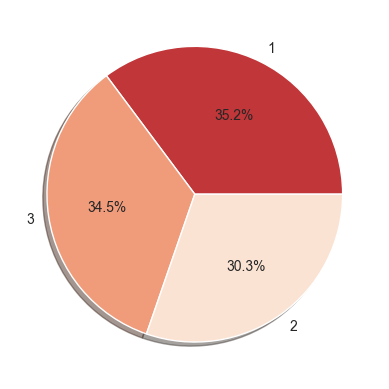

In [30]:
pie_plot("Month")

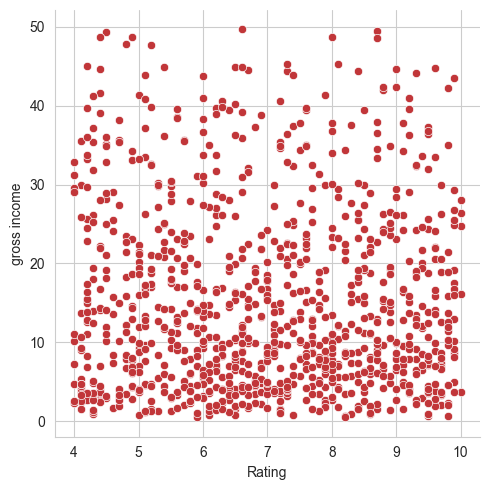

In [31]:
sns.relplot(x='Rating', y='gross income', data=data, kind='scatter')
plt.show()

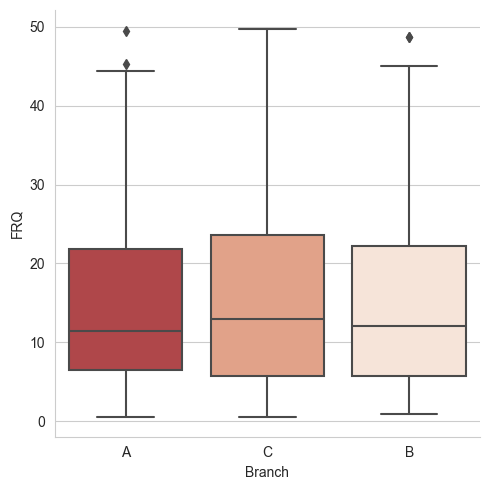

In [32]:
box_plot(x_axis = 'Branch', y_axis="gross income")

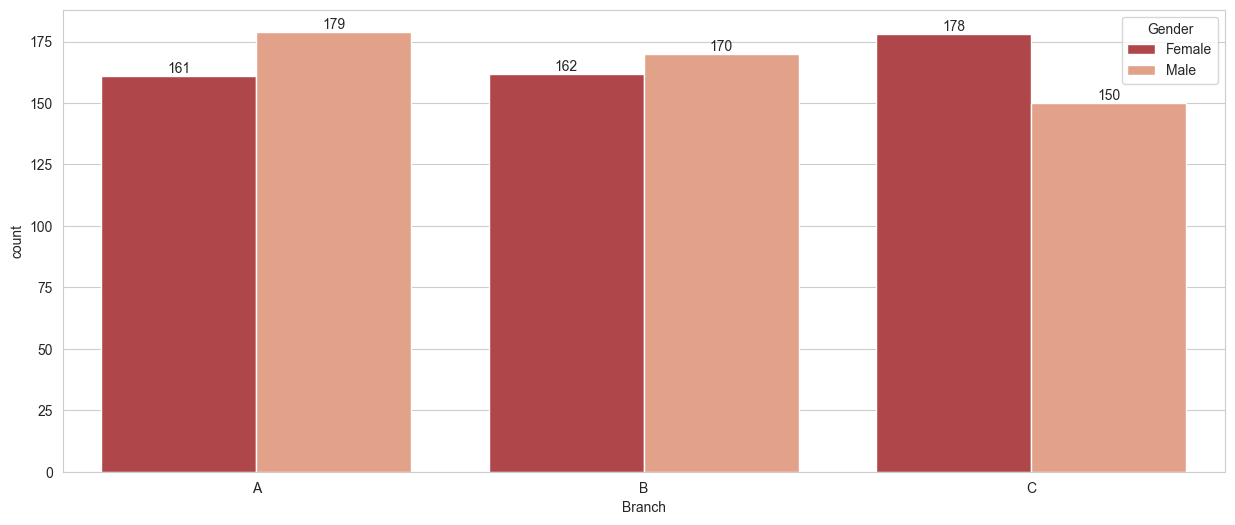

In [33]:
plt.figure(figsize=(15,6))
count_plot(x_axis='Branch', hue='Gender')

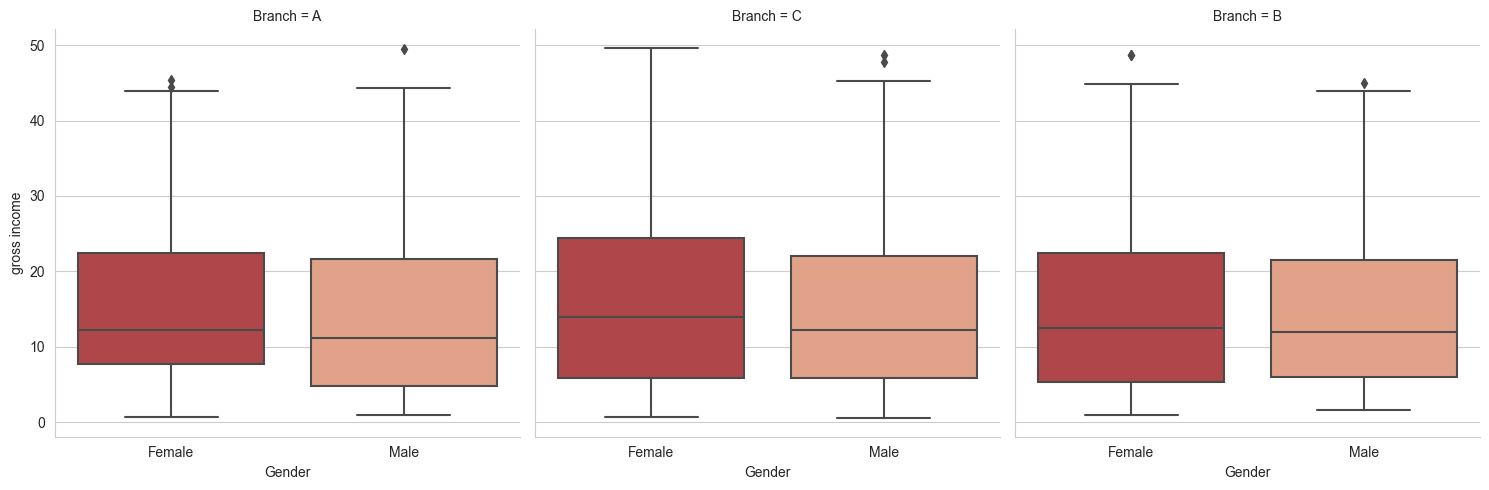

In [34]:
box_plot(x_axis = "Gender", y_axis="gross income", col="Branch")

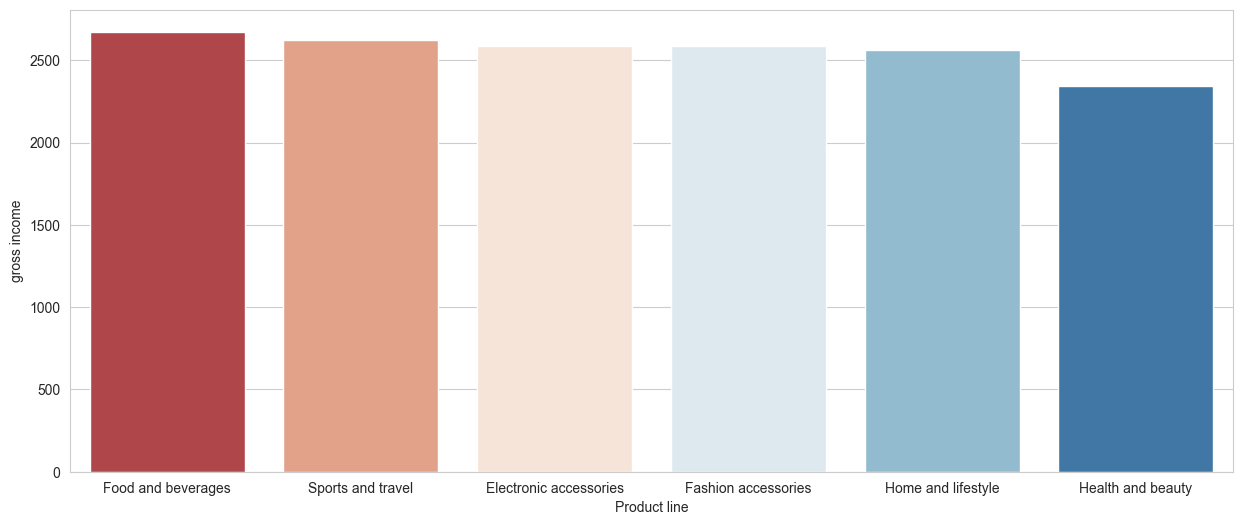

In [38]:
products = data.groupby("Product line")[["gross income"]].sum().sort_values(by = "gross income", ascending=False)

plt.figure(figsize=(15, 6))

sns.barplot(x = products.index, y="gross income", data=products)

plt.show()

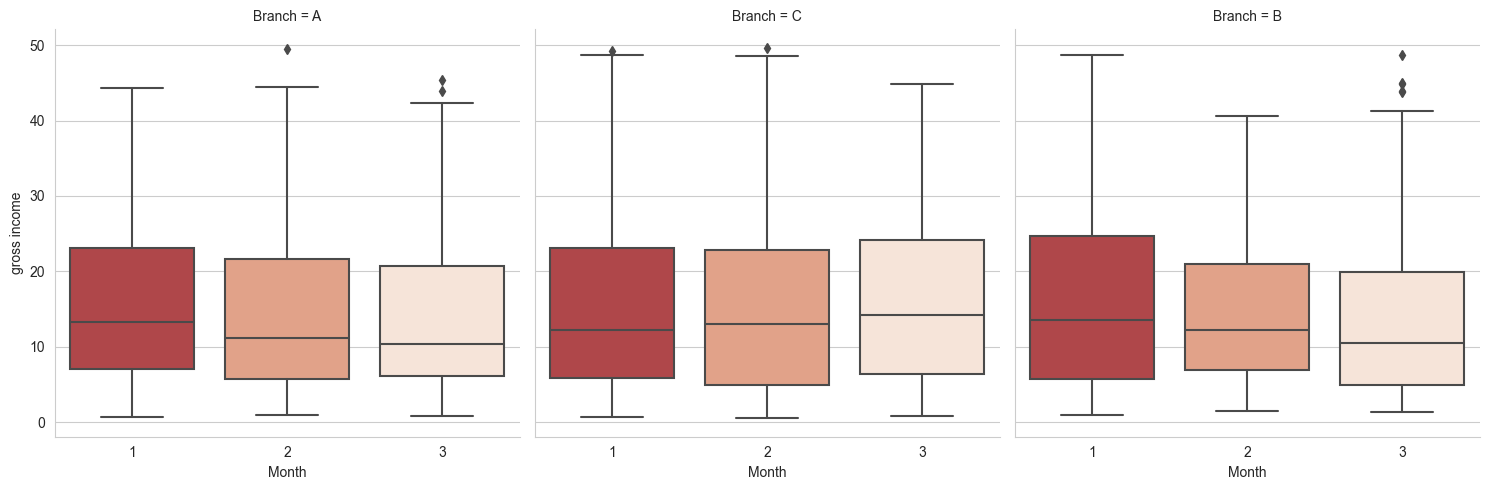

In [40]:
box_plot(x_axis='Month', y_axis='gross income', col='Branch')